# (0) Generate a synthetic static dataset

Generate a synthetic dataset with 
- features X
- label Y 

Note: data is stored in the folder "../../../data/static/" + dataset relativ to this directory

In [1]:
%load_ext autoreload
%autoreload 2

### Define paths 

In [2]:
# which dataset to work on 
dataset_name   = "synthetic_1"

In [3]:
# data specifications 
data_dir            = "../../../data/static/" + dataset_name + "/fully_observed/" 
data_file = data_dir  + dataset_name + '.csv'

## Data Generation

In [4]:
from afa.data_modelling.datasets.synthetic_data_generation.data_generator_static import DataGenerator_static

In [5]:
data_generator = DataGenerator_static(
                        data_dir        = data_dir,  
                        dataset_name    = dataset_name , 
                        n_datapts       = 100, 
                        test_size       = 0,
                        n_features      = 4, 
                        n_redundant     = 0, 
                        n_informative   = 3,
                        n_classes       = 2,
                        random_state    = 42 ) 

In [6]:
df_train, df_test  = data_generator.generate_data()

## Load data
Check if data was saved correctly and can be loaded 

In [7]:
from afa.data_modelling.datasets.data_loader.data_loader_static import DataLoader_static

2023-02-18 23:21:40.566319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 23:21:40.682444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-18 23:21:40.682463: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-18 23:21:41.325810: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [8]:
superfeature_mapping_file = None
data_loader = DataLoader_static( data_file                  = data_file,
                                 superfeature_mapping_file  = superfeature_mapping_file )

dataset = data_loader.load() 

In [9]:
# visualize pandas dataframe: 
dataset.data

,id,X0,X1,X2,X3,Y
0,0,-1.014128,-0.933042,0.322719,0.766160,0.0
1,1,1.466984,-1.275895,-2.123896,1.068270,1.0
2,2,-2.111619,-0.480863,-0.822220,-0.517866,0.0
3,3,0.947384,-1.151891,-0.401220,1.437839,1.0
4,4,1.107374,-2.332309,0.519347,3.167356,1.0
...,...,...,...,...,...,...
95,95,-1.538640,-0.805087,-0.825497,0.838788,0.0
96,96,-2.181807,-0.716707,0.244967,0.600542,0.0
97,97,1.309143,0.062745,0.950424,-0.916990,0.0
98,98,-0.324171,-0.556056,-0.288659,-1.245058,0.0


## Define problem
Check if problem definition works, see more in the `preparation01` tutorial

In [10]:
from afa.data_modelling.problem.problem_static import ProblemMaker_static

In [11]:
# define problem specifications
label_name = 'Y'
problem    = 'classification'
treatment  = None

problem_maker = ProblemMaker_static(problem=problem, label=[label_name], treatment=treatment)

dataset  = problem_maker.fit_transform(dataset)

In [12]:
# check if features/superfeatures/labels etc have been correctly assigned 
dataset.feature_name

{'data': ['X0', 'X1', 'X2', 'X3'],
 'treatment': None,
 'label': ['Y'],
 'super_data': ['X2', 'X1', 'X0', 'X3']}

## Explain the synthetic data generation process
Store information in reports folder in latex / markdown format

In [15]:
explanation_file = data_dir + 'synthetic_data_report'
data_generator.explain(file= explanation_file + '.md'  , format='markdown')
# data_generator.explain(file= explanation_file + '.tex'  , format='latex')

## Optional: Check feature importance
Use the feature-importance option of a random-forest classifier 

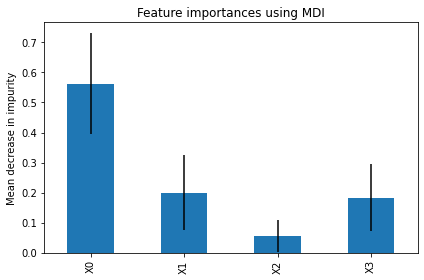

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = dataset.feature
y = dataset.label
feature_names = dataset.feature_name['data']   #[f"feature {i}" for i in range(n_features)]

def plot_feature_importances(X, y, feature_names):
    """
    Plot feature importances using a random forest classifier
    """
    
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X, y)


    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

    forest_importances = pd.Series(importances, index=feature_names)

    # plot
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    
plot_feature_importances(X, y, feature_names )